In [1]:
from itertools import chain
class Dijkstra:

    def __init__(self, input):
        self.input = input
        self.path = []


    def calculate(self):
        return [self.calculateFromOrigin(i) for i, v in enumerate(self.input)]


    def calculateFromOrigin(self, origin):
        distance = [-1 for i in range(len(self.input))]
        path = [-1 for i in range(len(self.input))] # vector to get the best path

        # Distance from origin to itself is always 0
        distance.pop(origin)
        distance.insert(origin, 0)
        priority = list(range(len(self.input)))

        while True:
            if (len(priority) == 0): break
            frm = self.getSmallestPossibleVertex(distance, priority)
            priority.remove(frm)
            options = self.getOptionList(self.input[frm])
            for [position, weight] in options:
                dist = distance[frm] + weight
                if distance[position] == -1 or dist < distance[position]:
                    distance.pop(position)
                    distance.insert(position, dist)
                    path.pop(position)
                    path.insert(position, frm)

        self.path.insert(origin, path)
        return distance


    def getSmallestPossibleVertex(self, distances, priority):
        smallestKey = -1
        smallestValue = -1
        for i, item in enumerate(distances):
            if (smallestValue == -1 or (item >= 0 and item < smallestValue)) and i in priority:
                smallestValue = item
                smallestKey = i
        return smallestKey


    def getOptionList(self, vector):
        return [[i, weight] for i, weight in enumerate(vector) if weight > 0]
    
    
    def getPath(self):
        return self.path
    
    
    def getBestPath(self, frm, to):
        return [i for i in reversed(self._getBestPath(frm, to, [to]))]
        
        
    def _getBestPath(self, frm, to, path):
        path_ = self.path[frm]
        lastNode = path_[to]
        path.append(lastNode)
        if (lastNode == frm):
            return path
        else:
            return self._getBestPath(frm, lastNode, path)
    def removePathWhenObjectDetected(self, inputX, inputY):
        
        
        

In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class GraphHelper:
    
    @staticmethod
    def printGraph(input, featured = 0):
        # Cria os nodes
        G = nx.DiGraph()
        for el1, vector in enumerate(input):
            for el2, w in enumerate(vector):
                if w > 0: G.add_edge(el1, el2, weight=w)
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        # Increase the size
        plt.figure(num=None, figsize=(4, 4), dpi=600)

        # Draw the basic
        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        # Set the color of the featured path
        if (featured):
            _featured = []
            for k, v in enumerate(featured):
                if (len(featured) >= k+2):
                    _featured.append((v, featured[k+1]))
            edge_colors = ['black' if not edge in _featured else 'red' for edge in G.edges()]
        else:
            edge_colors = 'black'
        
        nx.draw(G, pos, node_size = 700, node_color = G.nodes(), cmap=plt.cm.Blues, edge_color=edge_colors)

        plt.show()

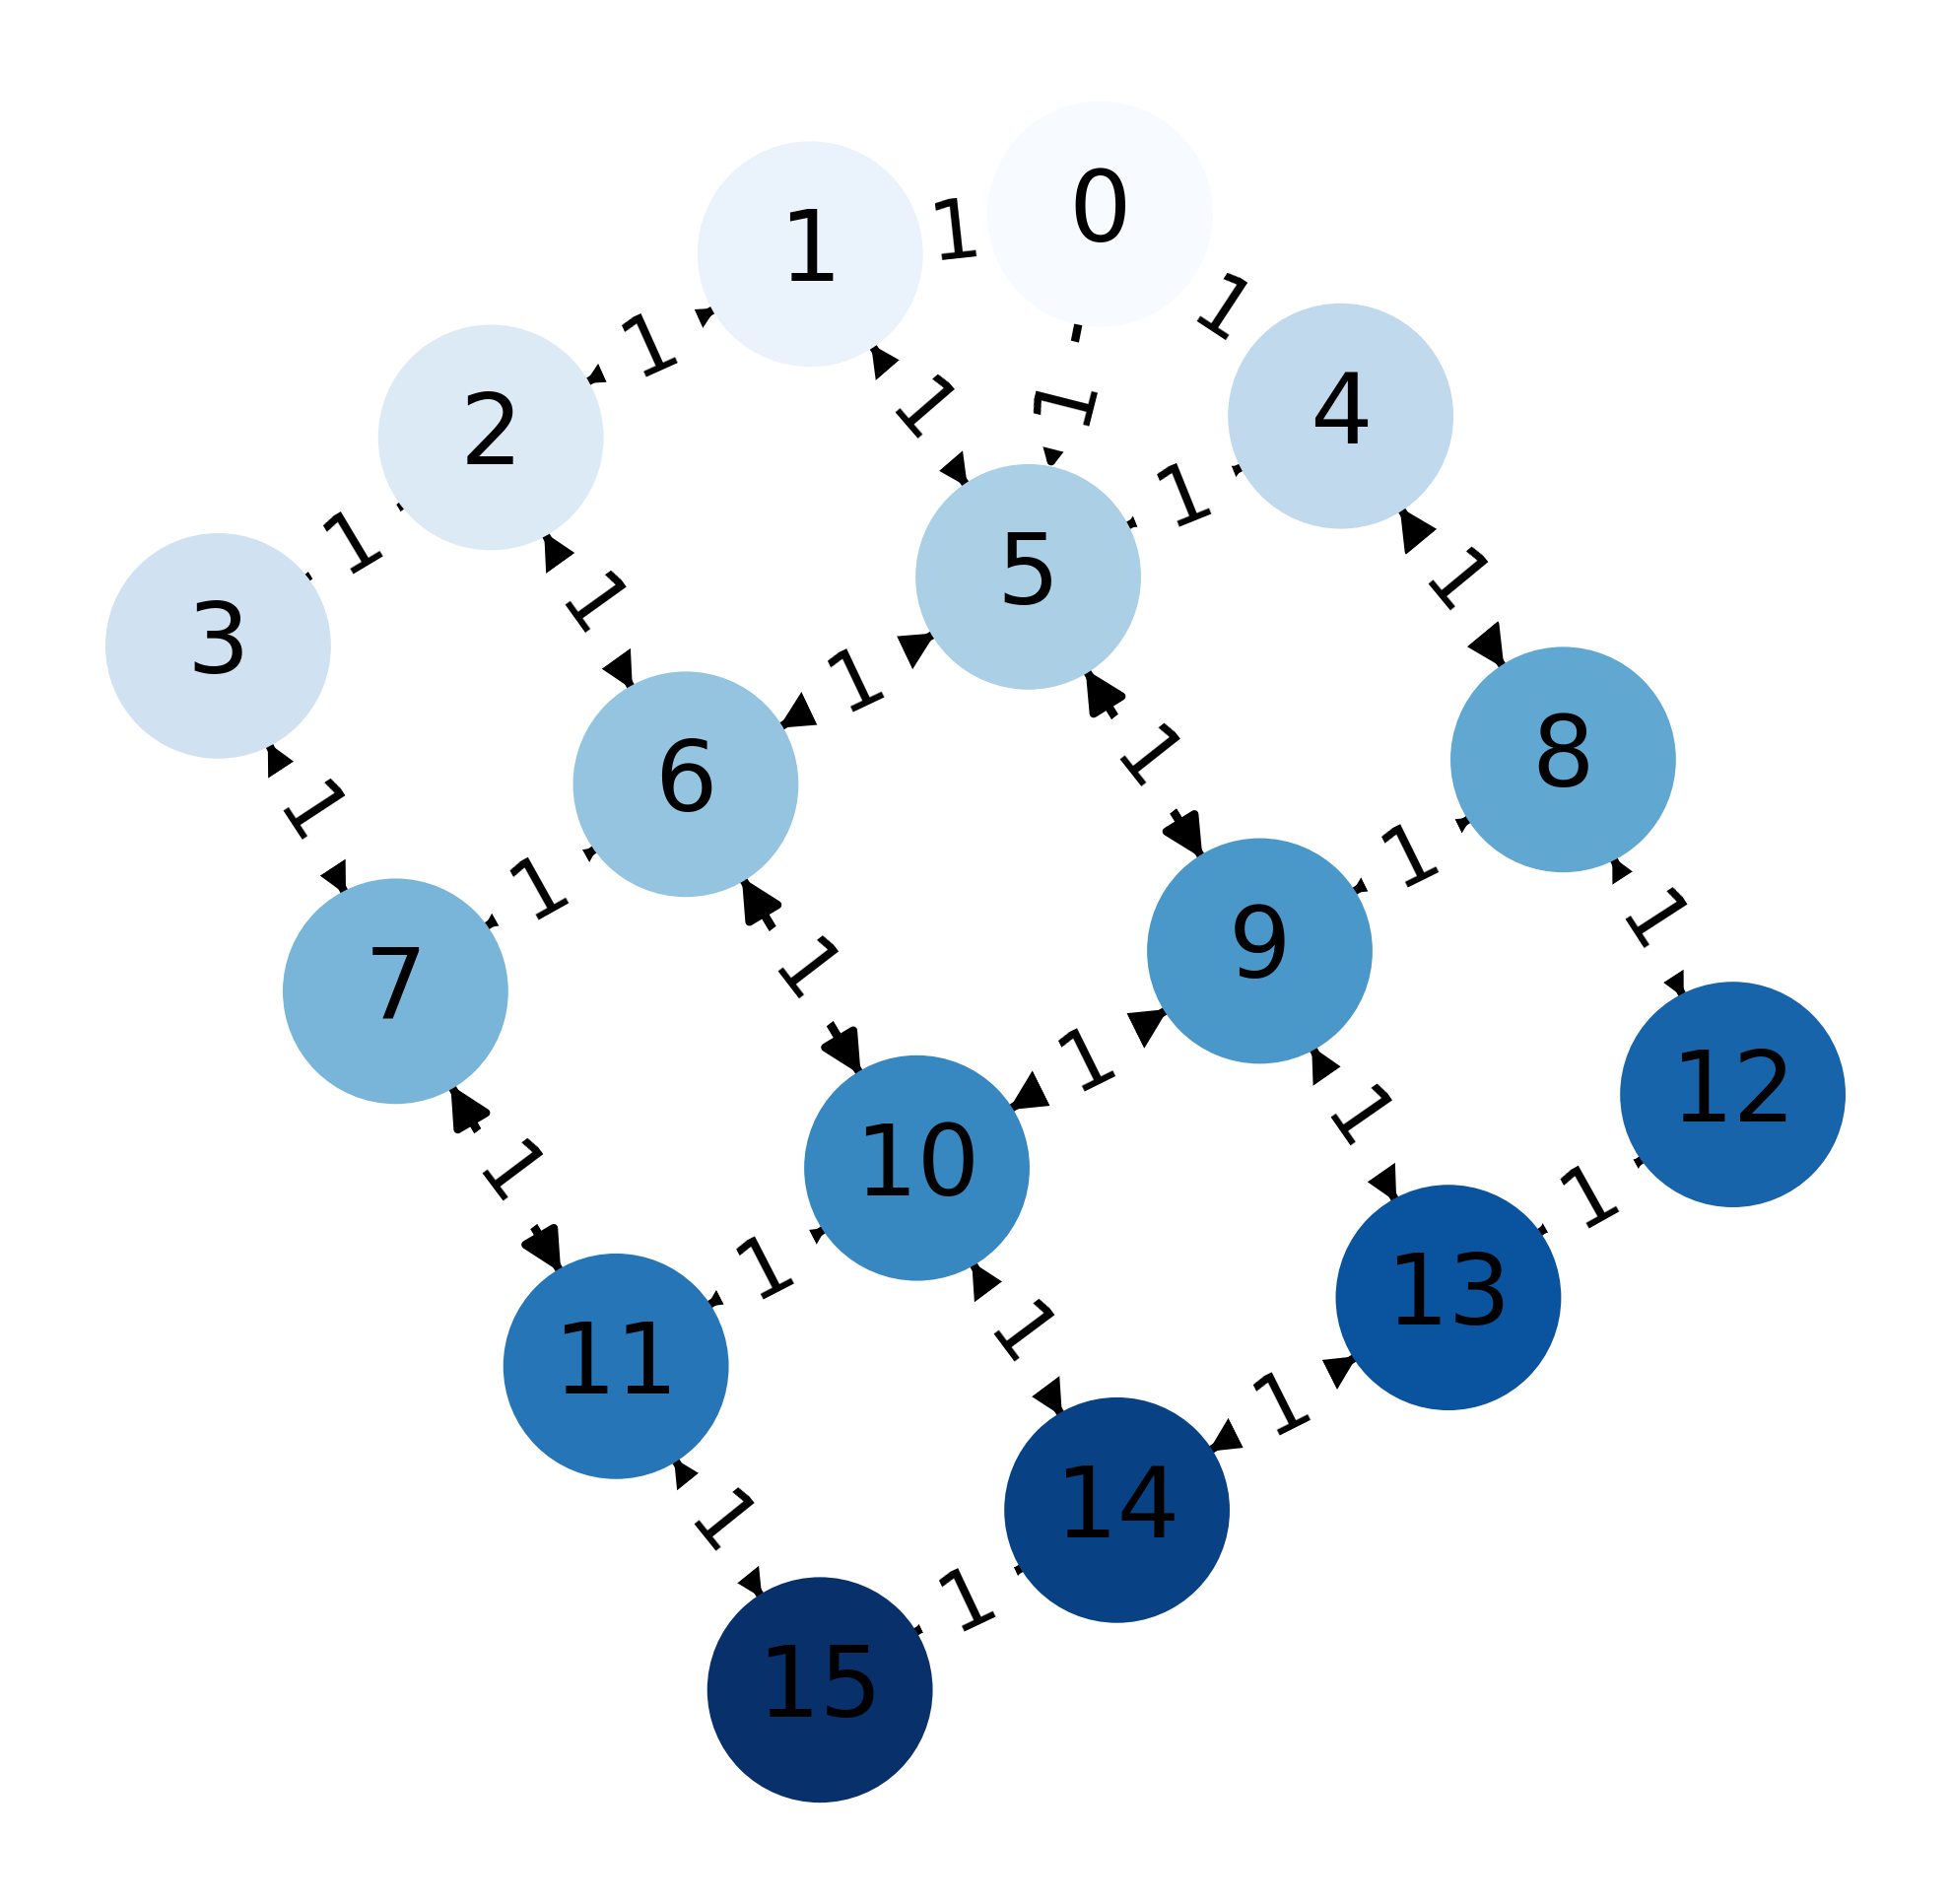

In [56]:
        #0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
input =[[0,1,0,0,1,1,0,0,0,0, 0, 0, 0, 0, 0 ,0], #0
        [1,0,1,0,0,1,0,0,0,0, 0, 0, 0, 0, 0 ,0], #1
        [0,1,0,1,0,0,1,0,0,0, 0, 0, 0, 0, 0 ,0], #2
        [0,0,1,0,0,0,0,1,0,0, 0, 0, 0, 0, 0 ,0], #3
        [1,0,0,0,0,1,0,0,1,0, 0, 0, 0, 0, 0 ,0], #4
        [0,1,0,0,1,0,1,0,0,1, 0, 0, 0, 0, 0 ,0], #5
        [0,0,1,0,0,1,0,1,0,0, 1, 0, 0, 0, 0 ,0], #6
        [0,0,0,1,0,0,1,0,0,0, 0, 1, 0, 0, 0 ,0], #7
        [0,0,0,0,1,0,0,0,0,1, 0, 0, 1, 0, 0 ,0], #8
        [0,0,0,0,0,1,0,0,1,0, 1, 0, 0, 1, 0 ,0], #9
        [0,0,0,0,0,0,1,0,0,1, 0, 1, 0, 0, 1 ,0], #10
        [0,0,0,0,0,0,0,1,0,0, 1, 0, 0, 0, 0 ,1], #11
        [0,0,0,0,0,0,0,0,1,0, 0, 0, 0, 1, 0 ,0], #12
        [0,0,0,0,0,0,0,0,0,1, 0, 0, 1, 0, 1 ,0], #13
        [0,0,0,0,0,0,0,0,0,0, 1, 0, 0, 1, 0 ,1], #14
        [0,0,0,0,0,0,0,0,0,0, 0, 1, 0, 0, 1 ,0]] #15

GraphHelper.printGraph(input)

In [11]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result): print ("from", k, v)

from 0 [0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 3, 4, 3, 3, 4, 5]
from 1 [1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4, 4, 3, 4, 5]
from 2 [2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3, 5, 4, 3, 4]
from 3 [3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2, 6, 5, 4, 3]
from 4 [1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5]
from 5 [2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4]
from 6 [3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3]
from 7 [4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2]
from 8 [2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4]
from 9 [3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3]
from 10 [4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2]
from 11 [5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1]
from 12 [3, 4, 5, 6, 2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3]
from 13 [4, 3, 4, 5, 3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2]
from 14 [5, 4, 3, 4, 4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1]
from 15 [6, 5, 4, 3, 5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0]


[2, 1, 0, 4]


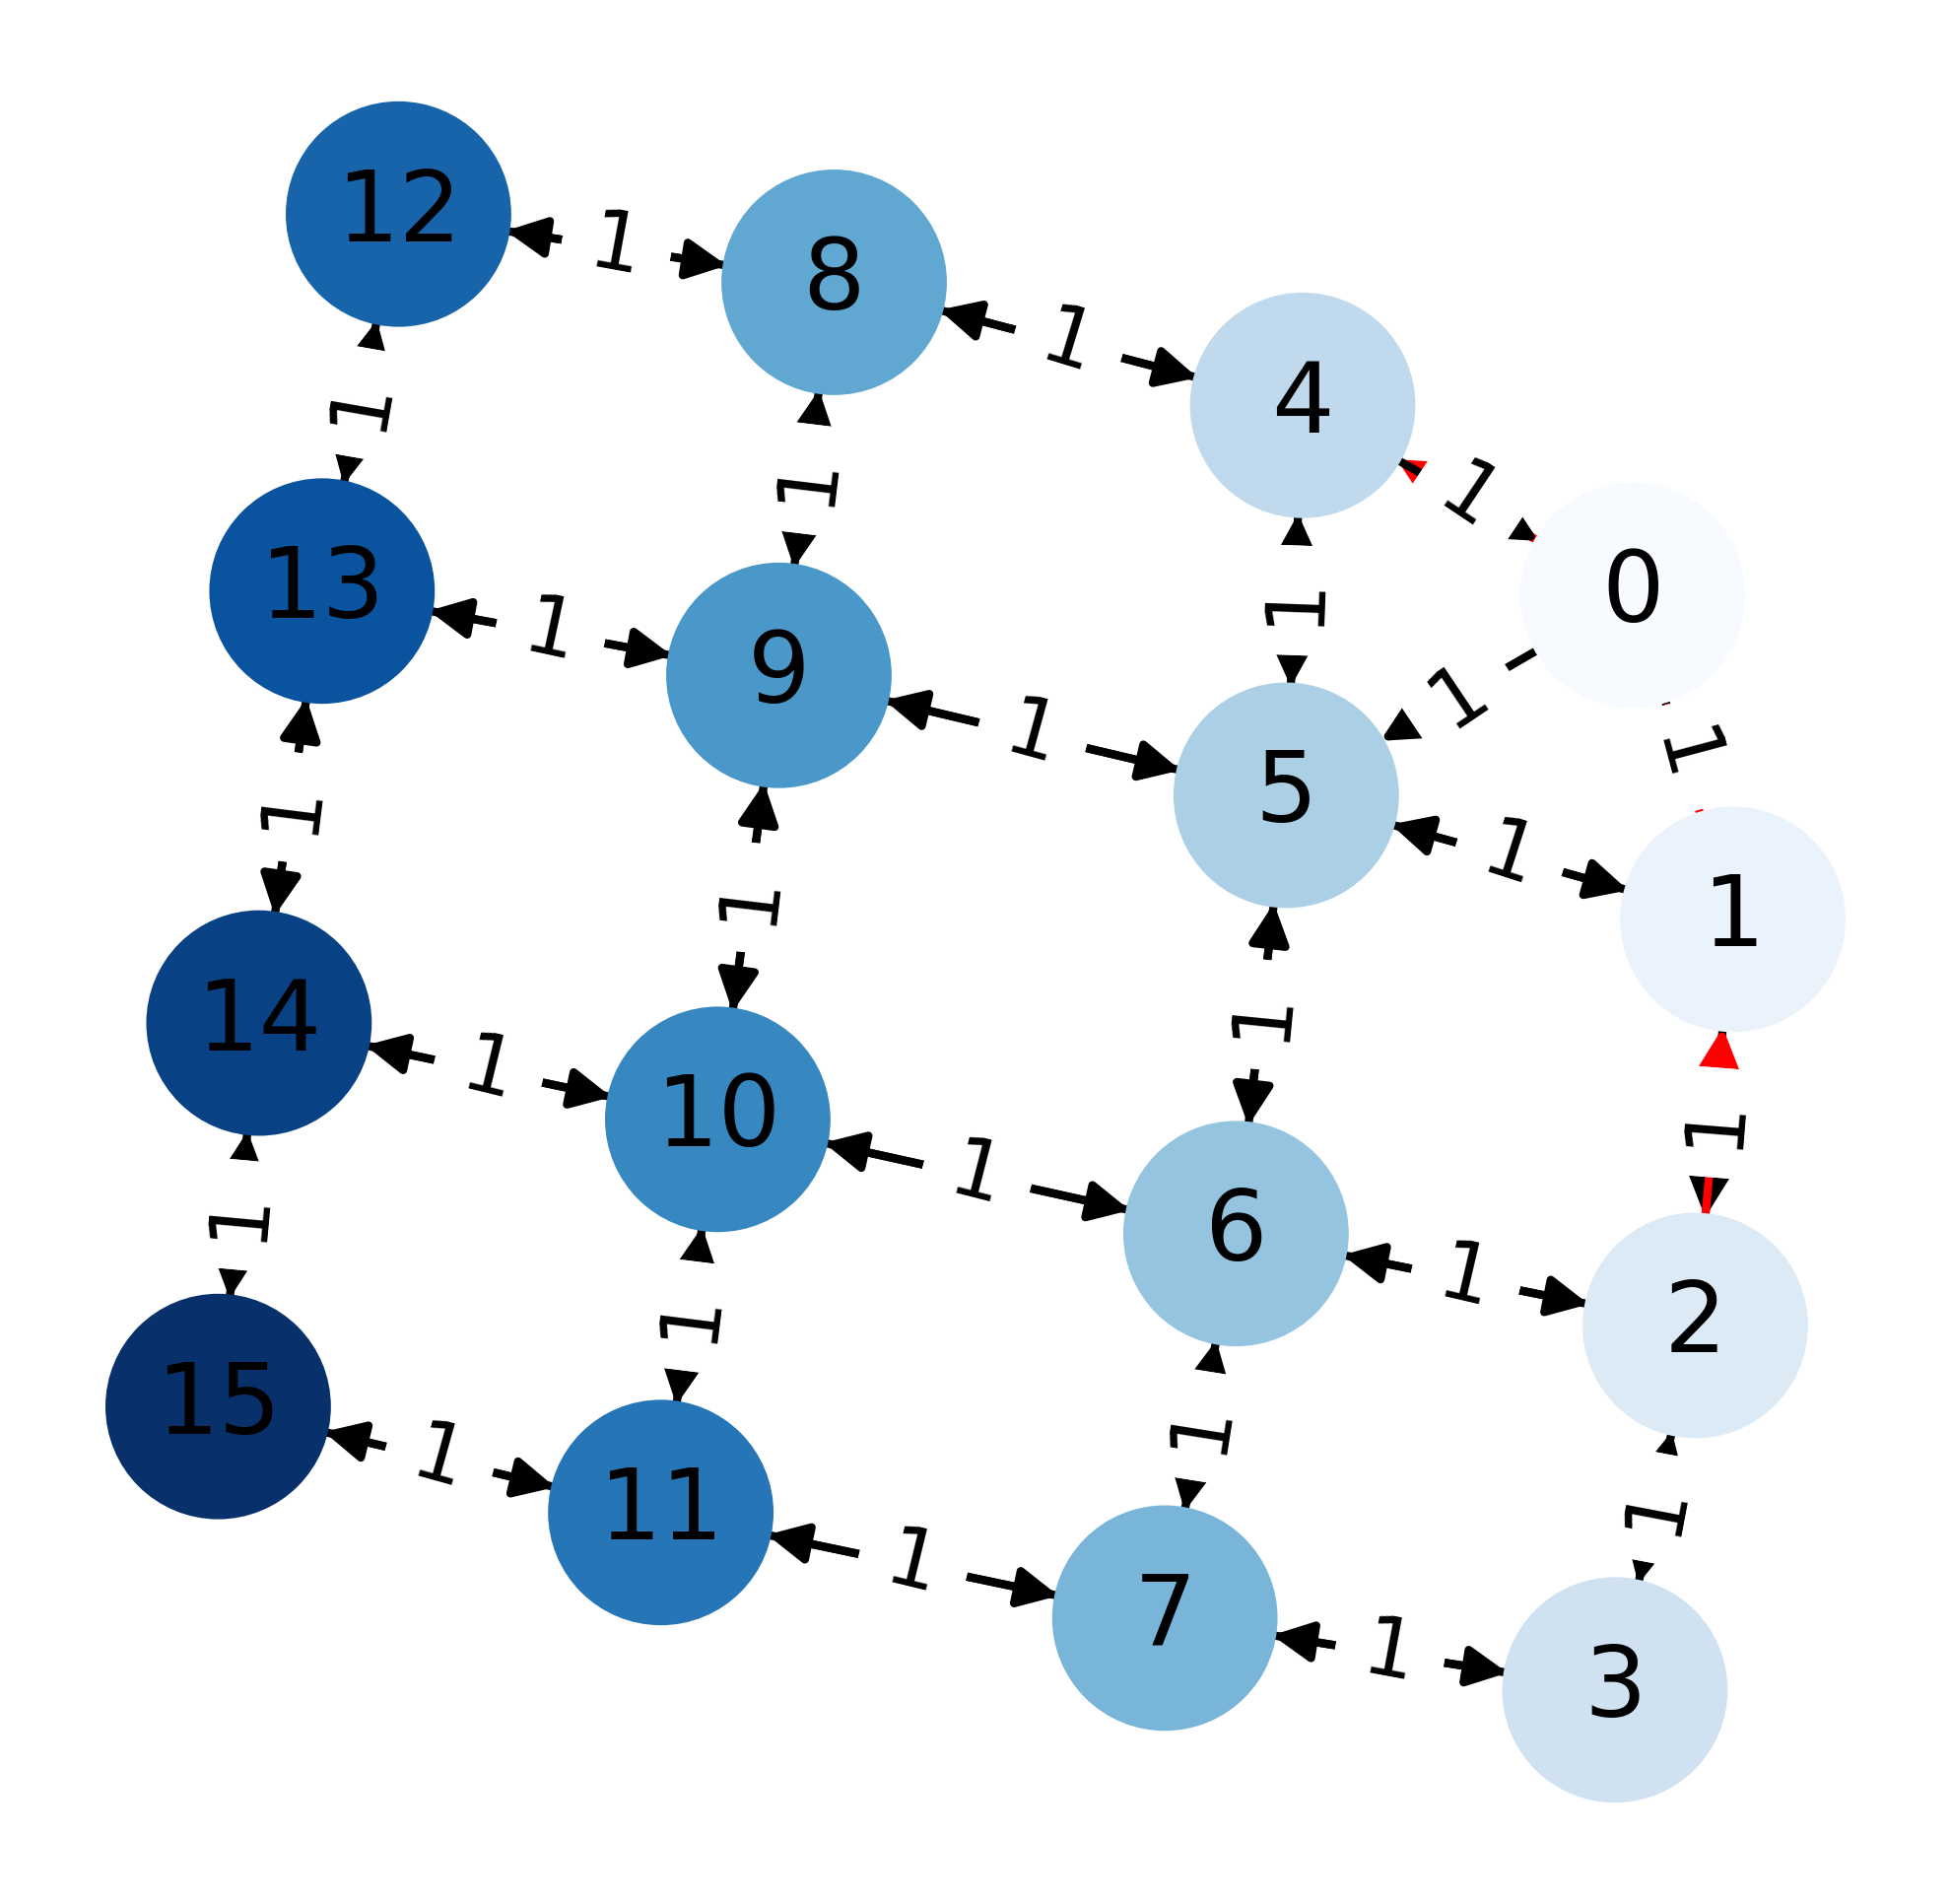

In [12]:
dj = Dijkstra(input)
result = dj.calculate()
print(dj.getBestPath(2, 4))
GraphHelper.printGraph(input, dj.getBestPath(2, 4))

[3, 2, 1, 0, 4, 8, 12]


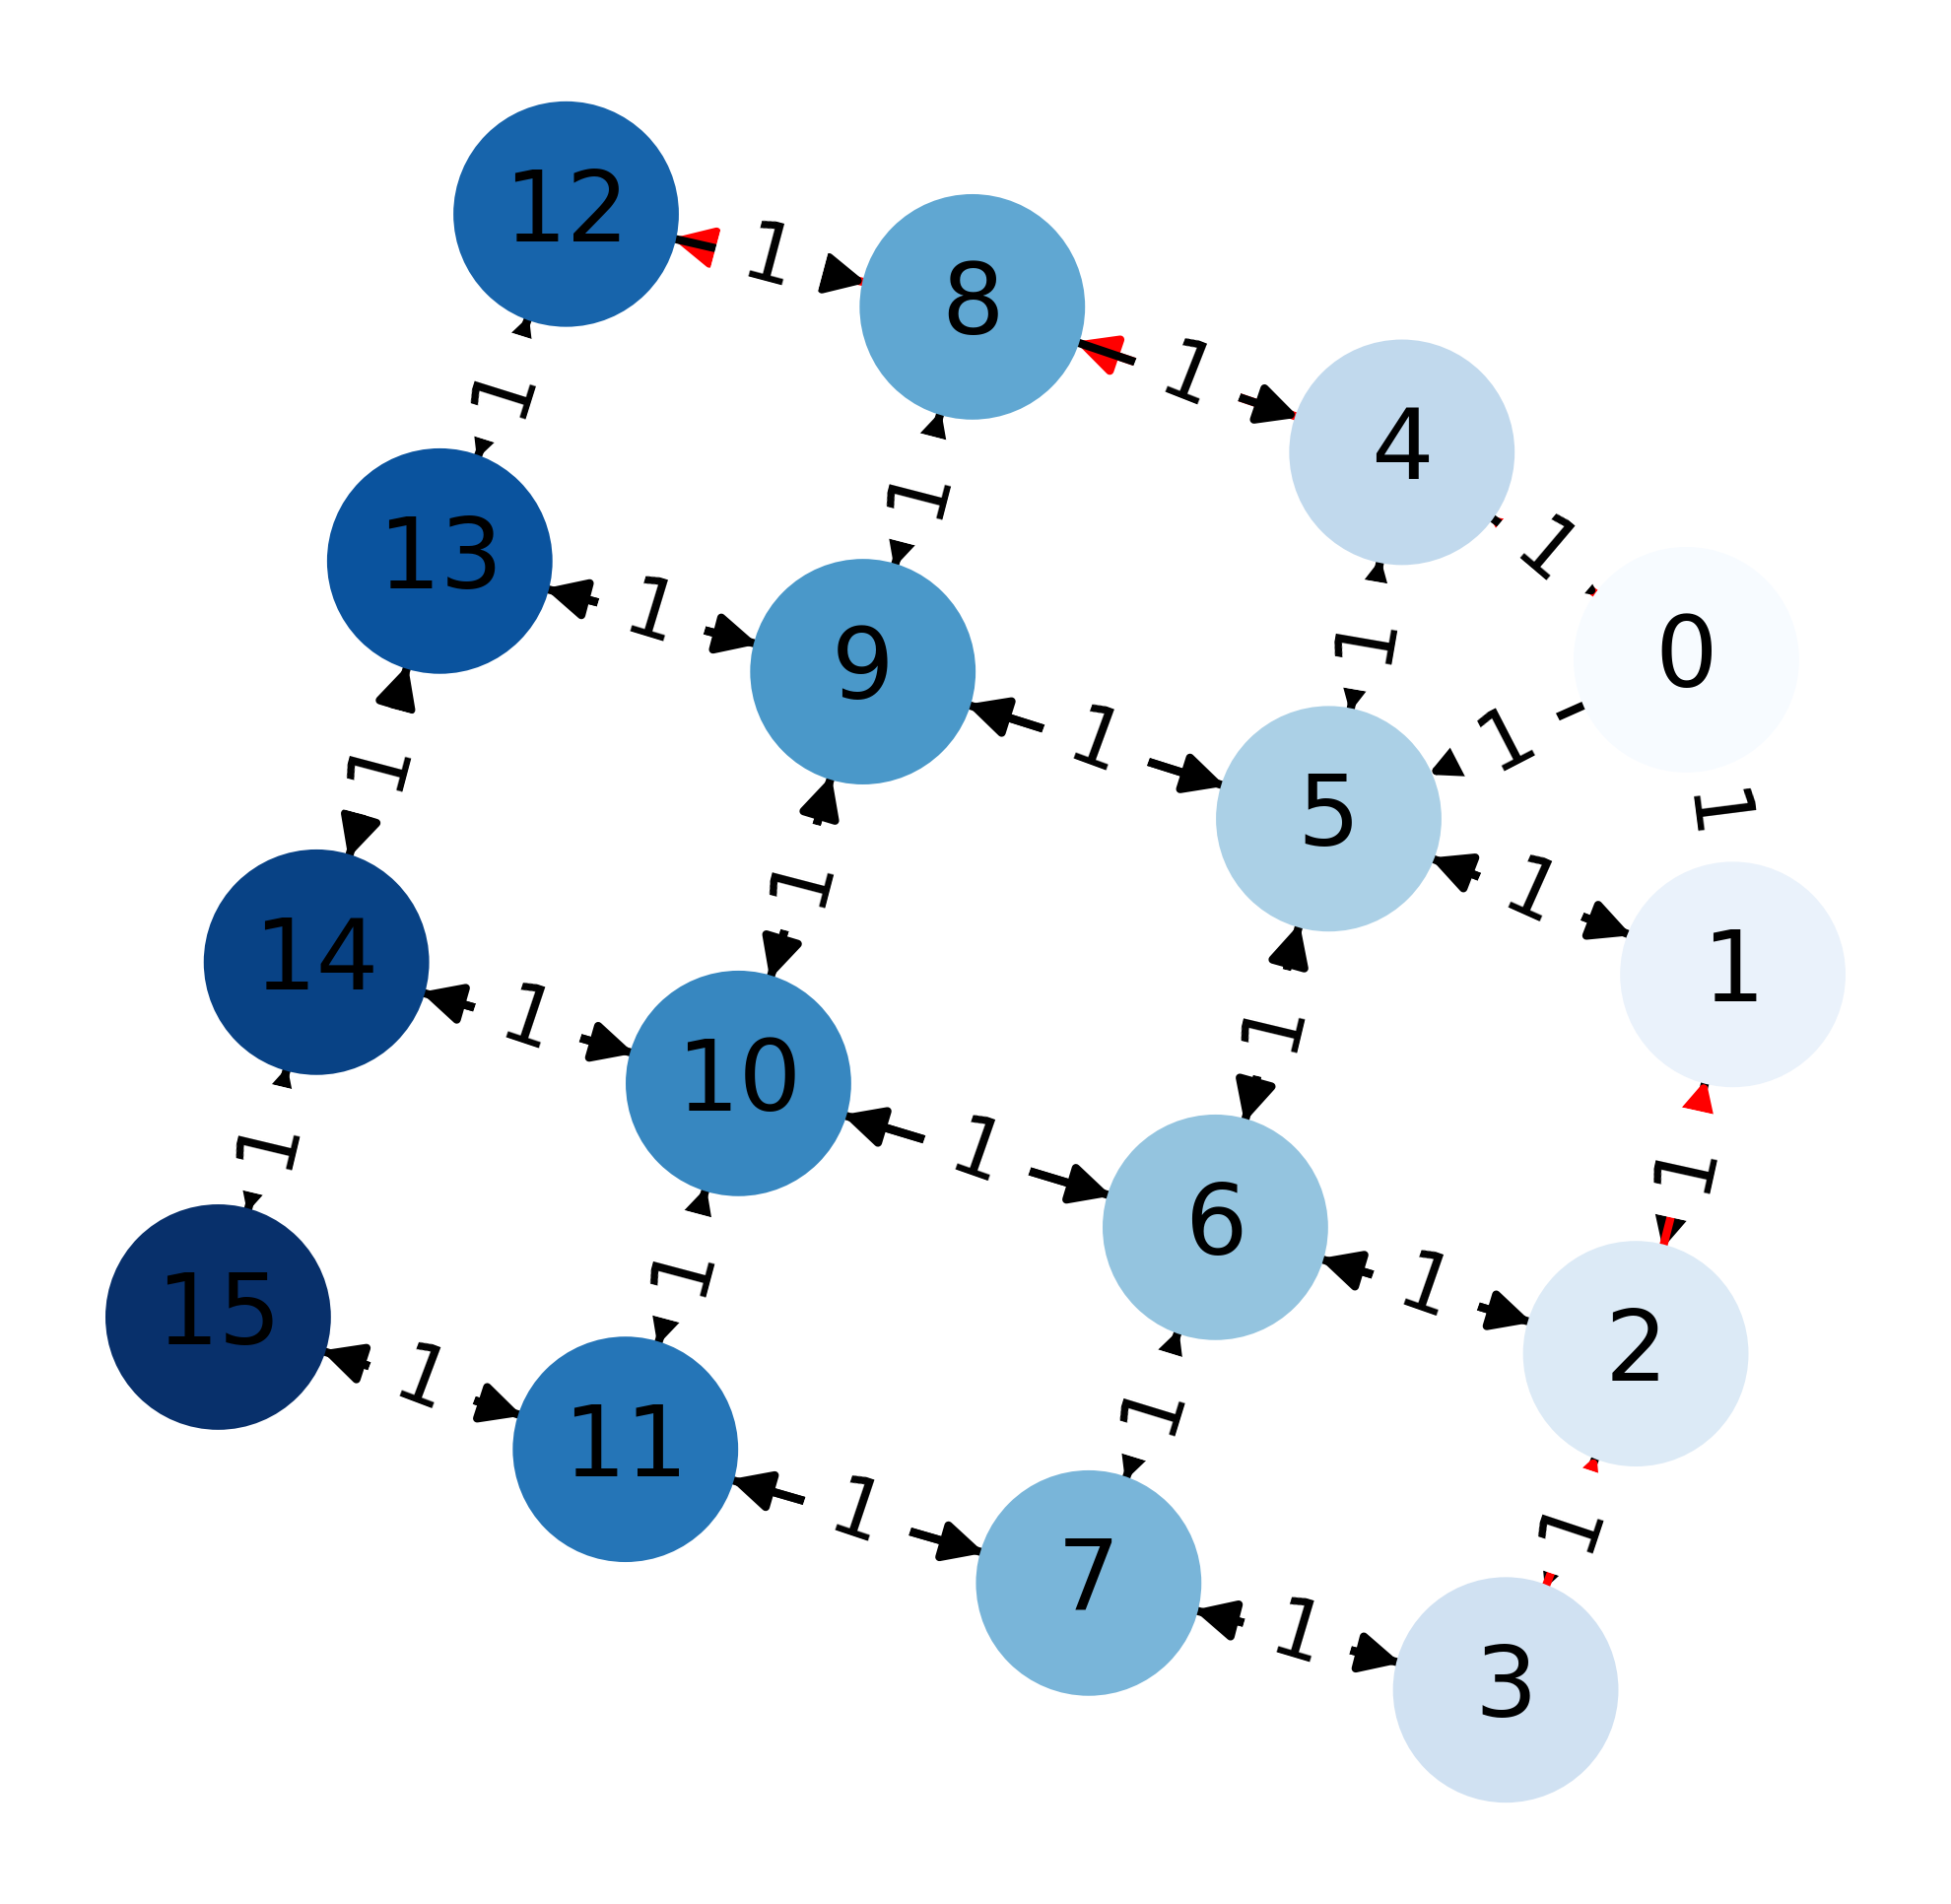

In [13]:
print(dj.getBestPath(3, 12))
GraphHelper.printGraph(input, dj.getBestPath(3, 12))